# Libraries

In [ ]:
import os

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

font_path = "..\\fonts\\Li Shadhinata 2.0 Unicode.ttf"
prop_font = fm.FontProperties(fname=font_path)

# Image Preprocessing

In [2]:
def preprocess_images(
    group_name, input_directory, output_directory, target_size=(60, 60)
):
    """
    - Resized (60, 60)
    - Convert to Grayscale
    - Gaussian Blur
    - Weighted Addition
    - Sharpening
    - Binary Threshold
    - PNG Format
    """

    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for index, filename in enumerate(os.listdir(input_directory)):
        if filename.endswith(".bmp") or filename.endswith(".png"):
            # Load the image using PIL
            img_path = os.path.join(input_directory, filename)
            print(f"Processing: {img_path}")
            img = Image.open(img_path)

            # Convert to grayscale
            img_gray = img.convert("L")

            # Resize
            img_resized = img_gray.resize(target_size)

            # Gaussian Blur
            img_blurred = img_resized.filter(ImageFilter.GaussianBlur(radius=2))

            # Weighted Addition (enhancing the original image)
            img_weighted = Image.blend(img_resized, img_blurred, alpha=0.5)

            # Sharpening Filter
            sharpen_filter = ImageFilter.UnsharpMask(radius=20, percent=150)
            img_sharpened = img_weighted.filter(sharpen_filter)

            # Binary Threshold
            threshold_value = 128  # You can adjust this value as needed
            img_binary = img_sharpened.point(
                lambda p: 255 if p > threshold_value else 0
            )

            # Save the processed image as PNG
            png_filename = f"{group_name} {index}.png"
            new_img_path = os.path.join(output_directory, png_filename)
            img_binary.save(new_img_path, "PNG")

            print(f"Saved: {new_img_path}")


root_dir = "..\\data\\raw\\Bangla Alphabets\\Train Test Combined"
save_dir = "..\\data\\processed"

for group_name in os.listdir(root_dir):
    group_path = os.path.join(root_dir, group_name)
    print("Group Path:", group_path)

    group_save_path = os.path.join(save_dir, group_name)

    preprocess_images(group_name, group_path, group_save_path)


Group Path: ..\data\raw\Bangla Alphabets\Train Test Combined\ং
Processing: ..\data\raw\Bangla Alphabets\Train Test Combined\ং\onushar (1).bmp
Saved: ..\data\processed\ং\ং 0.png
Processing: ..\data\raw\Bangla Alphabets\Train Test Combined\ং\onushar (1).png
Saved: ..\data\processed\ং\ং 1.png
Processing: ..\data\raw\Bangla Alphabets\Train Test Combined\ং\onushar (10).bmp
Saved: ..\data\processed\ং\ং 2.png
Processing: ..\data\raw\Bangla Alphabets\Train Test Combined\ং\onushar (100).bmp
Saved: ..\data\processed\ং\ং 3.png
Processing: ..\data\raw\Bangla Alphabets\Train Test Combined\ং\onushar (101).bmp
Saved: ..\data\processed\ং\ং 4.png
Processing: ..\data\raw\Bangla Alphabets\Train Test Combined\ং\onushar (101).png
Saved: ..\data\processed\ং\ং 5.png
Processing: ..\data\raw\Bangla Alphabets\Train Test Combined\ং\onushar (102).bmp
Saved: ..\data\processed\ং\ং 6.png
Processing: ..\data\raw\Bangla Alphabets\Train Test Combined\ং\onushar (102).png
Saved: ..\data\processed\ং\ং 7.png
Processing: ..

# Plot Pre-Processed Images

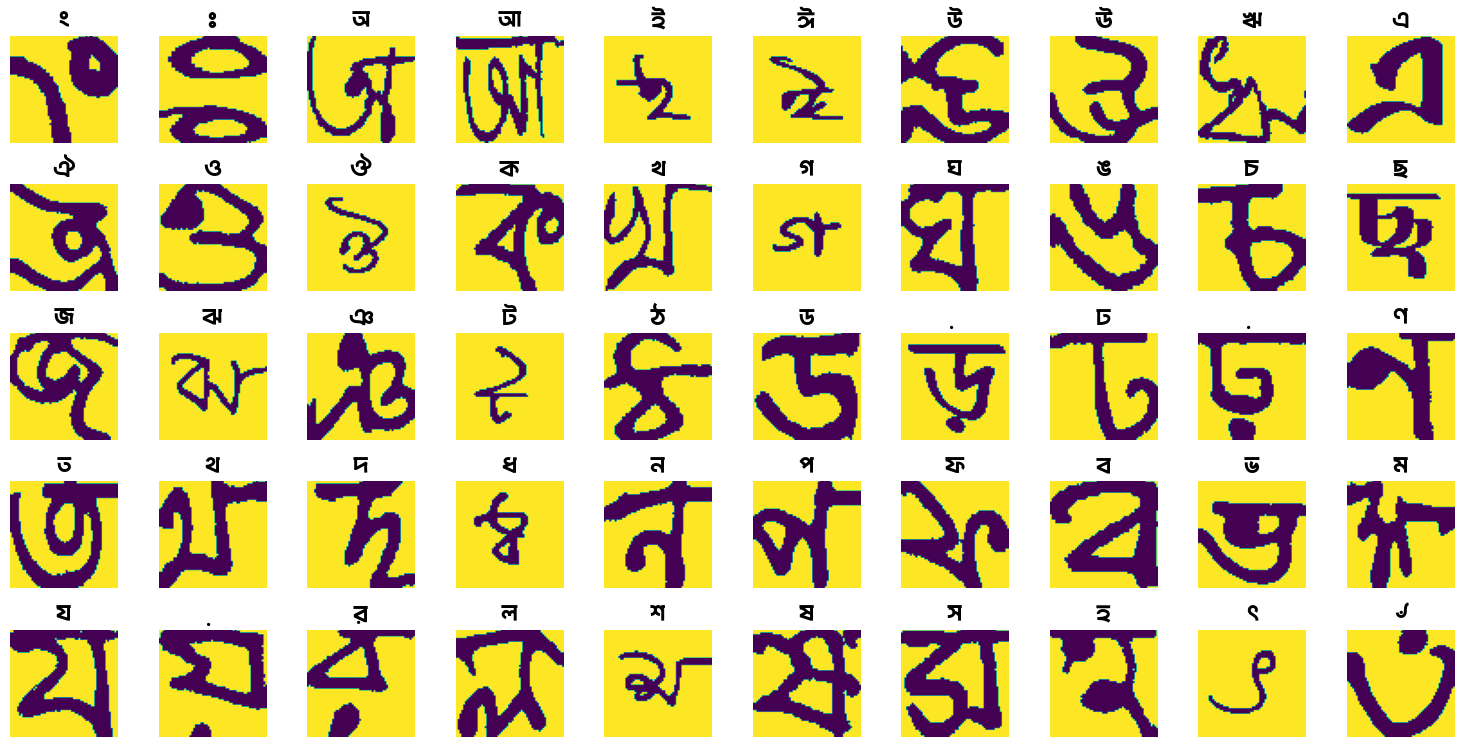

In [3]:
import random


def load_random_images(input_directory):
    """
    - Class = 50
    - Load one random image from each class directory.
    """
    selected_images = []

    class_dirs = [
        f"{os.path.join(input_directory, d)}" for d in os.listdir(input_directory)
    ]

    for class_path in class_dirs:
        random_img_index = random.randint(0, len(os.listdir(class_path)) - 1)

        selected_image = os.path.join(
            class_path, os.listdir(class_path)[random_img_index]
        )
        img = Image.open(selected_image)
        selected_images.append((img, class_path[-1]))

    return selected_images


def display_images(images_with_labels):
    plt.figure(figsize=(15, 15))

    for i, (img, label) in enumerate(images_with_labels):
        plt.subplot(10, 10, i + 1)  # Create a 10x10 grid
        plt.imshow(img)
        plt.title(label, fontproperties=prop_font, fontsize=18)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


input_dir = "..\\data\\processed"
random_images = load_random_images(input_dir)
display_images(random_images)

# Train, Validation, Test Split

In [ ]:
import splitfolders

input_folder = "..\\data\\processed"
output_folder = "..\\data\\splitted"

# Split the dataset into train (70%), validation (20%), and test (10%)
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.2, 0.1))

# Models

- CNN1 mypc : **Accuracy: 93.28%** - Model: **CNN1_e50_mypc.h5**
- [CNN1](https://www.kaggle.com/code/ahmednoorim/bangla-alphabet-recognition-model-cnn1) kaggle: **Accuracy: 92.8%** - Model: **CNN1_e50.h5**
- [CNN2](https://www.kaggle.com/code/ahmednoorim/bangla-alphabet-recognition-model-cnn2) kaggle: **Accuracy: 89.7%** - Model: **CNN2_e50.h5**
- [CNN3](https://www.kaggle.com/code/ahmednoorim/bangla-alphabet-recognition-model-cnn3) kaggle: **Accuracy: 92.33%** - Model: **CNN3_e50.h5**